In [ ]:
# 'Numpy' is used for mathematical operations on large, multi-dimensional arrays and matrices
import numpy as np

# 'Pandas' is used for data manipulation and analysis
import pandas as pd

# 'Seaborn' is based on matplotlib; used for plotting statistical graphics
import seaborn as sns

# 'Matplotlib' is a data visualization library for 2D and 3D plots, built on numpy
import matplotlib.pyplot as plt
%matplotlib inline

## 1. Load Data

In this section, we load the CSV file into a pandas DataFrame.

- **Primary approach**: Use `pd.read_csv()` to load the entire file.
- **Fallback approach**: If a `MemoryError` occurs (for very large files), the file is read in **chunks** using the `chunksize` parameter and then concatenated.

Key outputs:
- Overall **shape** of the dataset: number of rows and columns.
- List of **column names** to understand available features.


In [ ]:
df = pd.read_csv('/content/INX_Future_Inc_Employee_Performance_CDS_Project2_Data_V1.8.csv')
df

,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,...,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
0,E1001000,32,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,10,3,...,4,10,2,2,10,7,0,8,No,3
1,E1001006,47,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,14,4,...,4,20,2,3,7,7,1,7,No,3
2,E1001007,40,Male,Life Sciences,Married,Sales,Sales Executive,Travel_Frequently,5,4,...,3,20,2,3,18,13,1,12,No,4
3,E1001009,41,Male,Human Resources,Divorced,Human Resources,Manager,Travel_Rarely,10,4,...,2,23,2,2,21,6,12,6,No,3
4,E1001010,60,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,16,4,...,4,10,1,3,2,2,2,2,No,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1195,E100992,27,Female,Medical,Divorced,Sales,Sales Executive,Travel_Frequently,3,1,...,2,6,3,3,6,5,0,4,No,4
1196,E100993,37,Male,Life Sciences,Single,Development,Senior Developer,Travel_Rarely,10,2,...,1,4,2,3,1,0,0,0,No,3
1197,E100994,50,Male,Medical,Married,Development,Senior Developer,Travel_Rarely,28,1,...,3,20,3,3,20,8,3,8,No,3
1198,E100995,34,Female,Medical,Single,Data Science,Data Scientist,Travel_Rarely,9,3,...,2,9,3,4,8,7,7,7,No,3


## 2. Basic Info

This block provides a high-level overview of the dataset structure.

- `df.info()` shows:
  - Column names
  - Data types (`int`, `float`, `object`, etc.)
  - Non-null counts per column (helps identify missing values)
- `df.isnull().sum()` gives the **count of missing values** for each column.
- `df.head()` prints the **first 5 rows** to get a quick feel of the data format and example values.

This step is useful to:
- Verify types (numeric vs categorical)
- Detect obvious data-quality issues early
- Confirm that the dataset has loaded correctly


In [ ]:
df.shape

(1200, 28)

In [ ]:
df.dtypes

,0
EmpNumber,object
Age,int64
Gender,object
EducationBackground,object
MaritalStatus,object
EmpDepartment,object
EmpJobRole,object
BusinessTravelFrequency,object
DistanceFromHome,int64
EmpEducationLevel,int64


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1200.0,36.918333,9.087289,18.0,30.0,36.0,43.0,60.0
DistanceFromHome,1200.0,9.165833,8.176636,1.0,2.0,7.0,14.0,29.0
EmpEducationLevel,1200.0,2.892500,1.044120,1.0,2.0,3.0,4.0,5.0
EmpEnvironmentSatisfaction,1200.0,2.715833,1.090599,1.0,2.0,3.0,4.0,4.0
EmpHourlyRate,1200.0,65.981667,20.211302,30.0,48.0,66.0,83.0,100.0
EmpJobInvolvement,1200.0,2.731667,0.707164,1.0,2.0,3.0,3.0,4.0
EmpJobLevel,1200.0,2.067500,1.107836,1.0,1.0,2.0,3.0,5.0
EmpJobSatisfaction,1200.0,2.732500,1.100888,1.0,2.0,3.0,4.0,4.0
NumCompaniesWorked,1200.0,2.665000,2.469384,0.0,1.0,2.0,4.0,9.0
EmpLastSalaryHikePercent,1200.0,15.222500,3.625918,11.0,12.0,14.0,18.0,25.0


In [ ]:
df.columns

Index(['EmpNumber', 'Age', 'Gender', 'EducationBackground', 'MaritalStatus',
       'EmpDepartment', 'EmpJobRole', 'BusinessTravelFrequency',
       'DistanceFromHome', 'EmpEducationLevel', 'EmpEnvironmentSatisfaction',
       'EmpHourlyRate', 'EmpJobInvolvement', 'EmpJobLevel',
       'EmpJobSatisfaction', 'NumCompaniesWorked', 'OverTime',
       'EmpLastSalaryHikePercent', 'EmpRelationshipSatisfaction',
       'TotalWorkExperienceInYears', 'TrainingTimesLastYear',
       'EmpWorkLifeBalance', 'ExperienceYearsAtThisCompany',
       'ExperienceYearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'Attrition', 'PerformanceRating'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 28 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   EmpNumber                     1200 non-null   object
 1   Age                           1200 non-null   int64 
 2   Gender                        1200 non-null   object
 3   EducationBackground           1200 non-null   object
 4   MaritalStatus                 1200 non-null   object
 5   EmpDepartment                 1200 non-null   object
 6   EmpJobRole                    1200 non-null   object
 7   BusinessTravelFrequency       1200 non-null   object
 8   DistanceFromHome              1200 non-null   int64 
 9   EmpEducationLevel             1200 non-null   int64 
 10  EmpEnvironmentSatisfaction    1200 non-null   int64 
 11  EmpHourlyRate                 1200 non-null   int64 
 12  EmpJobInvolvement             1200 non-null   int64 
 13  EmpJobLevel       

In [ ]:
df.isnull().sum()

,0
EmpNumber,0
Age,0
Gender,0
EducationBackground,0
MaritalStatus,0
EmpDepartment,0
EmpJobRole,0
BusinessTravelFrequency,0
DistanceFromHome,0
EmpEducationLevel,0


##  Univariate Analysis

###  Numeric Features (Histograms)
All numeric columns were visualized using histograms to understand their distributions.  
Key observations:
- Several numeric features display near-normal distributions (e.g., Age).
- Some variables show right-skew (e.g., DistanceFromHome).
- Ordinal job metrics (like satisfaction levels) cluster around discrete integer values.
- Histograms help identify skewness, unusual peaks, and potential transformation needs.

###  Categorical Features (Count Plots)
Count plots were generated for all categorical variables.  
Insights include:
- Dominance of certain categories (e.g., male employees, specific job roles).
- Some attributes exhibit class imbalance, which may affect downstream modeling.
- Count plots reveal high-frequency categories and help detect rare categories that may need grouping.


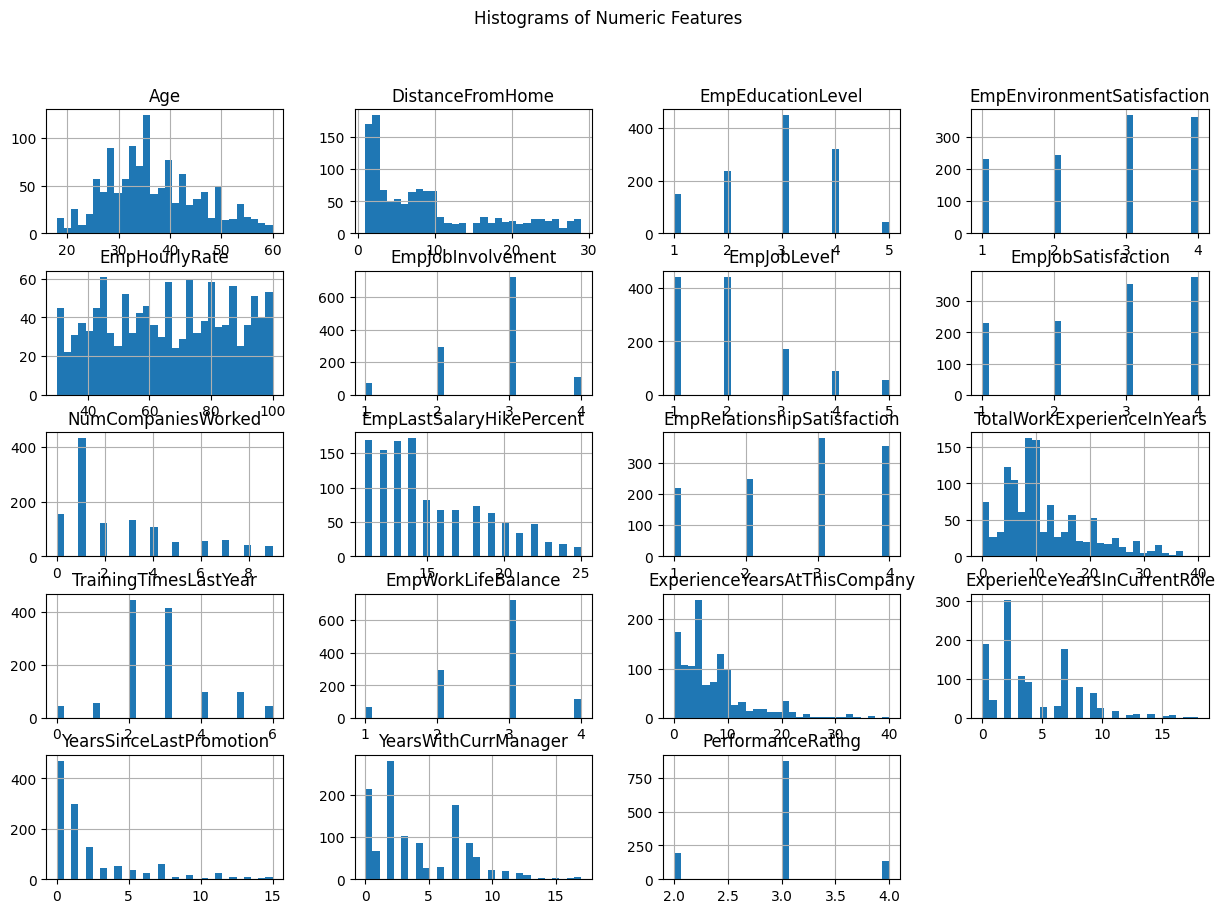

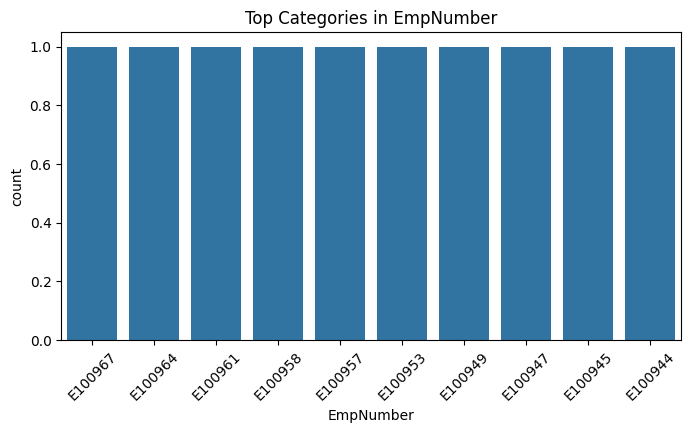

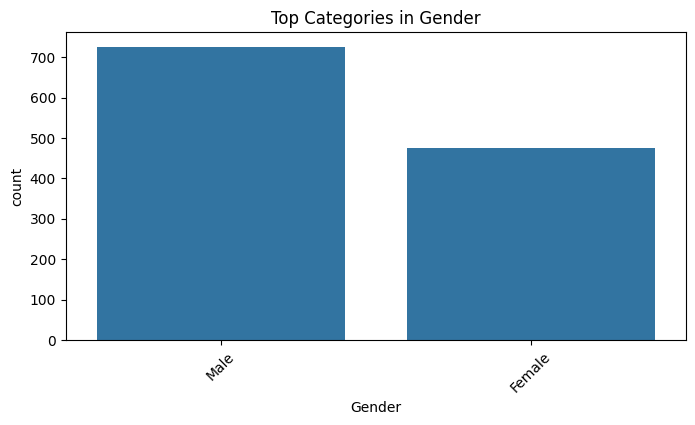

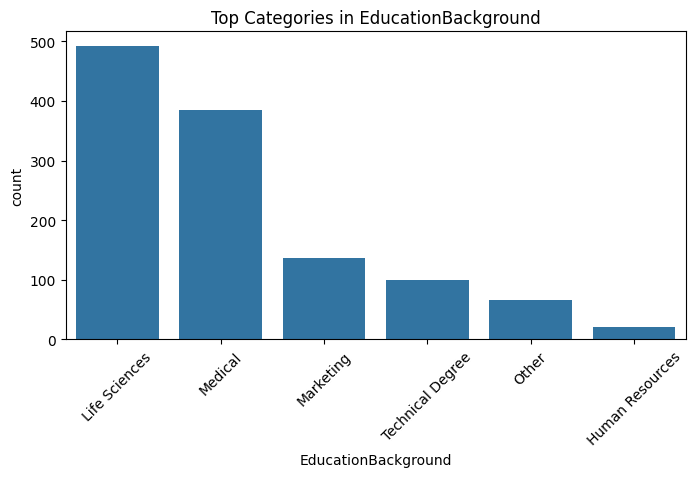

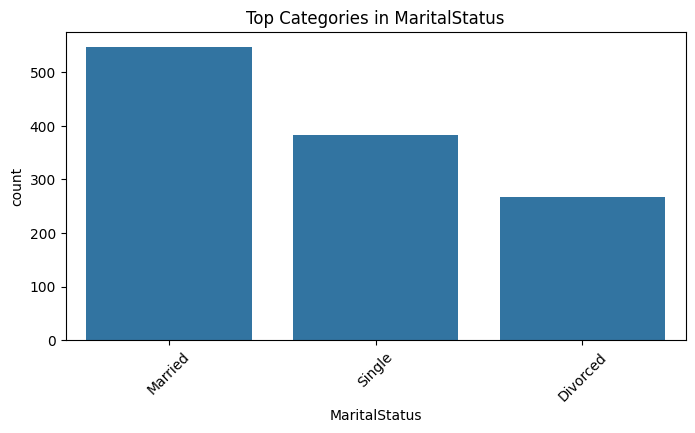

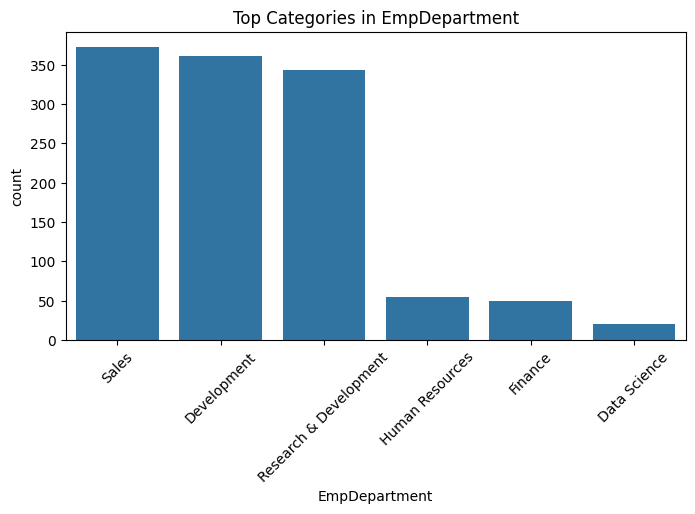

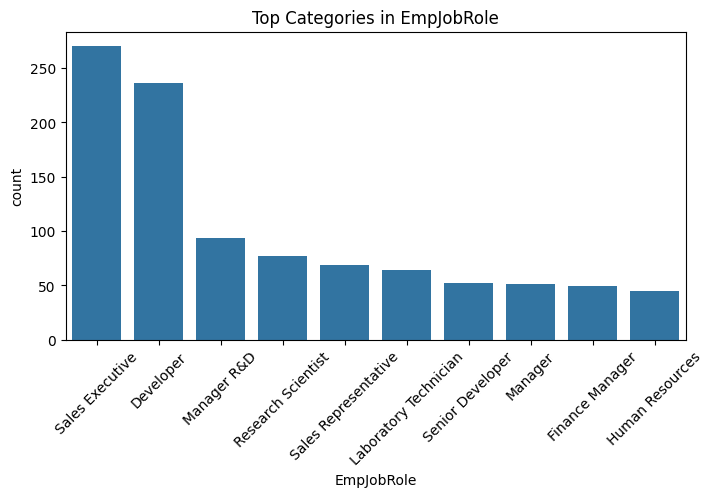

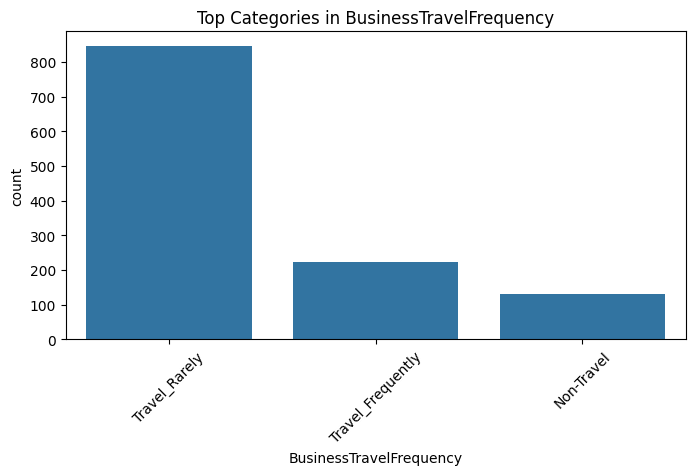

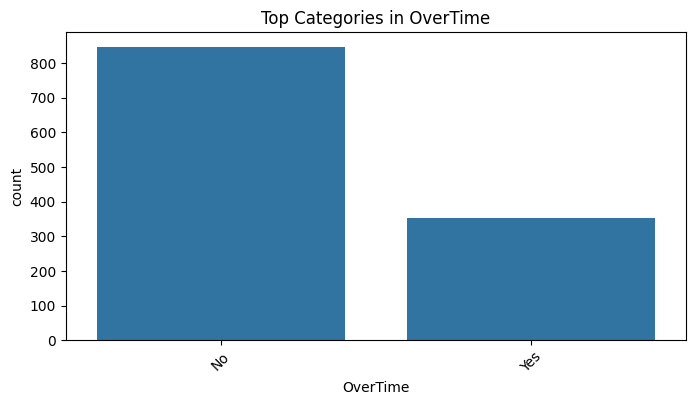

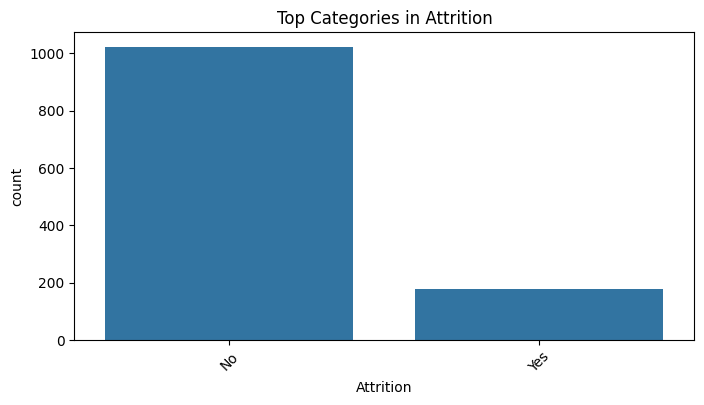

In [ ]:
# Univariate Analysis

# Histograms for numeric columns
numeric_cols = df.select_dtypes(include=np.number).columns
df[numeric_cols].hist(figsize=(15, 10), bins=30)
plt.suptitle("Histograms of Numeric Features")
plt.show()

# Countplots for categorical columns
categorical_cols = df.select_dtypes(include="object").columns
for col in categorical_cols:
    plt.figure(figsize=(8, 4))
    sns.countplot(data=df, x=col, order=df[col].value_counts().index[:10])
    plt.title(f"Top Categories in {col}")
    plt.xticks(rotation=45)
    plt.show()


In [ ]:
sns.pairplot(df, diag_kind='kde')

##  Correlation Analysis

A correlation matrix was computed for all numeric features and visualized using a heatmap.  
Key findings:
- Strong correlations exist among experience-related variables (e.g., YearsAtCompany, YearsWithManager).
- Most numeric variables show weak correlation with the target variable, indicating categorical features may influence outcomes more strongly.
- Heatmap helps detect multicollinearity, guiding feature selection or dimensionality reduction steps.


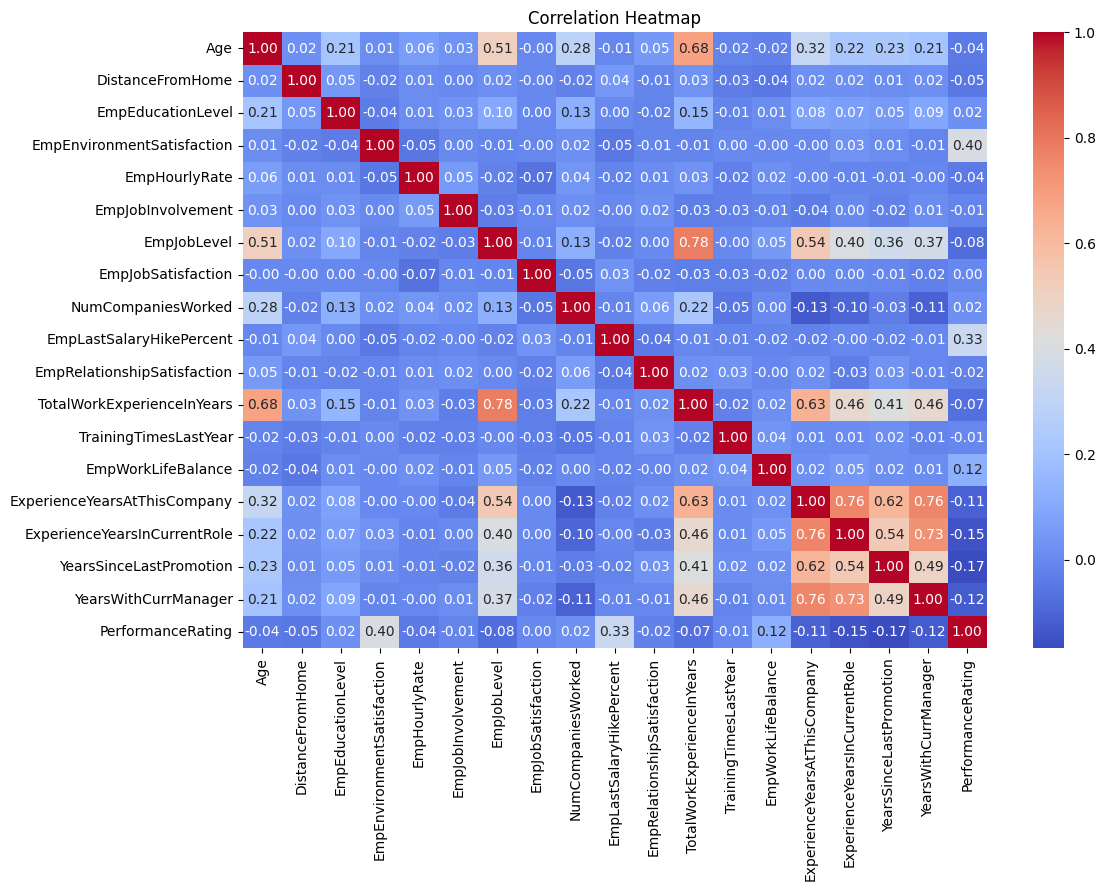

In [ ]:
# Correlation Analysis

plt.figure(figsize=(12, 8))
corr = df[numeric_cols].corr()
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()



##  Outlier Detection

Boxplots were generated for each numeric attribute to identify extreme values.  
Observations:
- Some numerical fields show clear outliers (e.g., DistanceFromHome, YearsSinceLastPromotion).
- These outliers may require:
  - Capping (winsorization)
  - Transformation
  - Removal, depending on modeling requirements  
- Outlier detection is crucial for preventing instability in regression and distance-based algorithms.


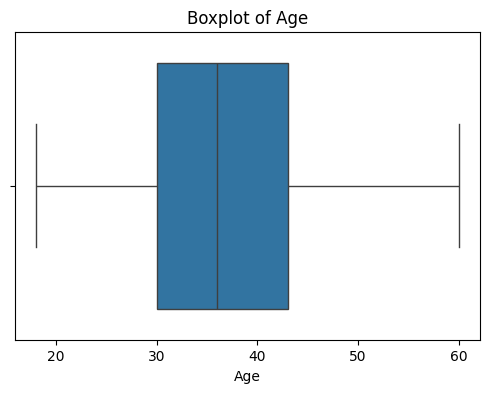

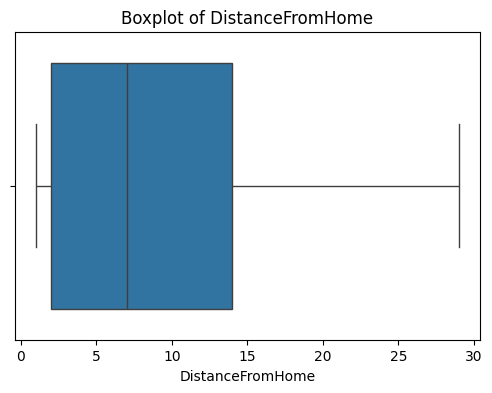

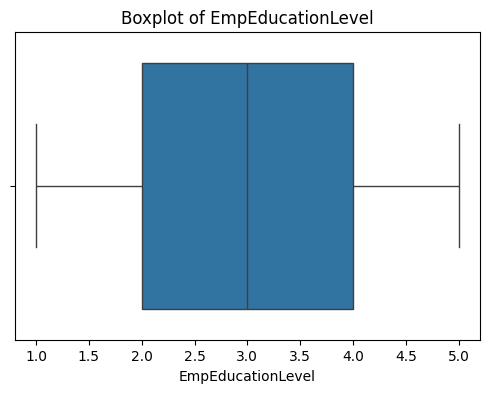

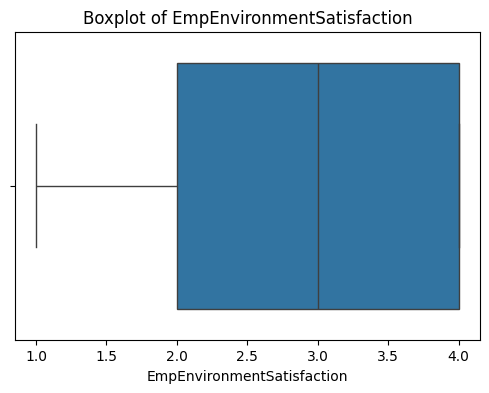

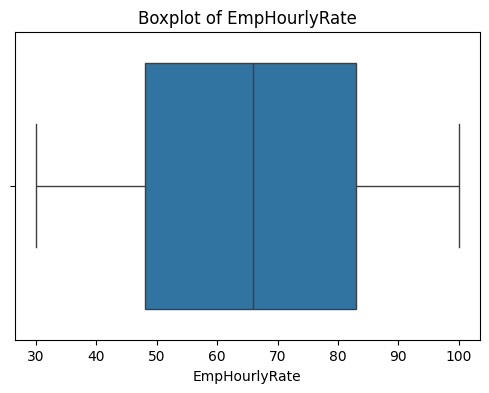

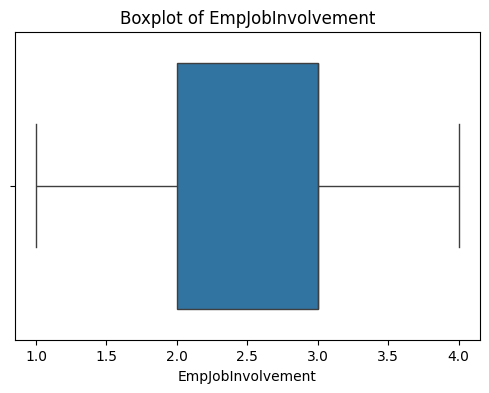

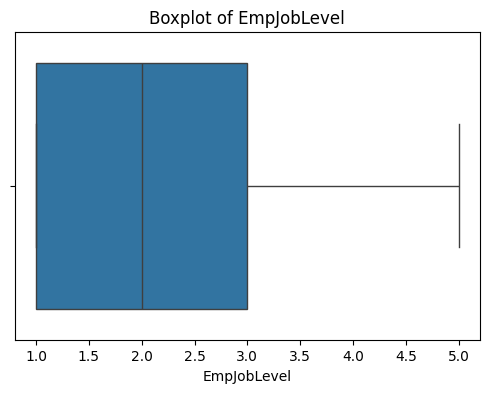

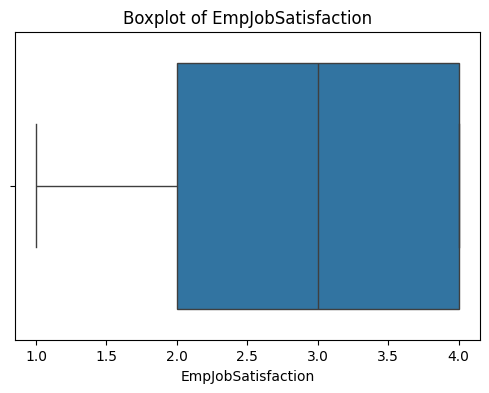

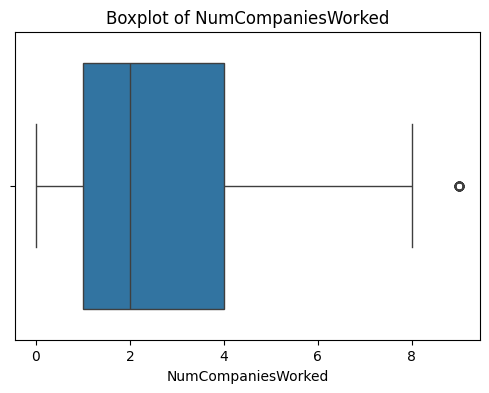

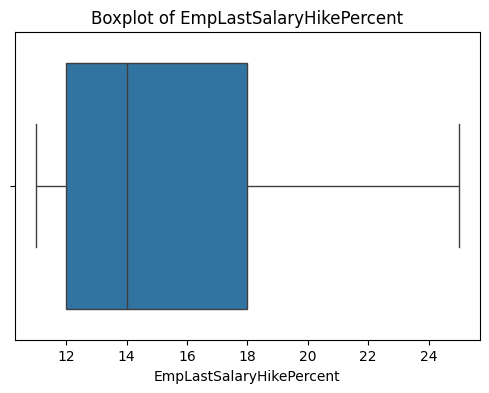

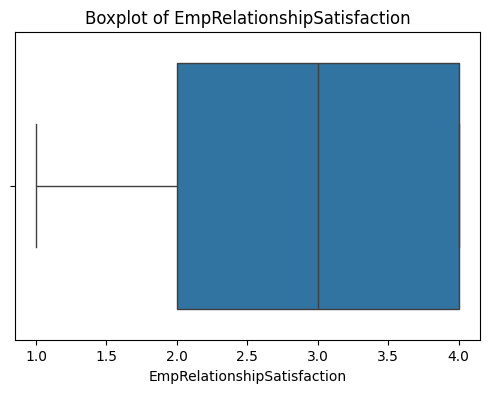

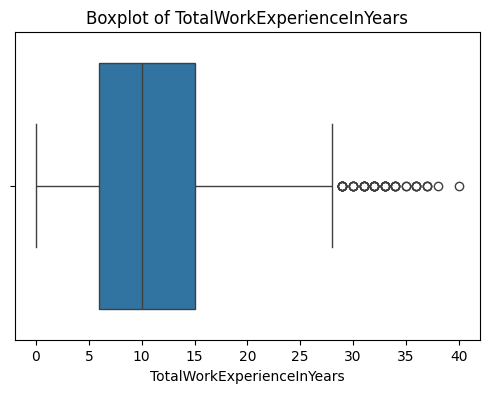

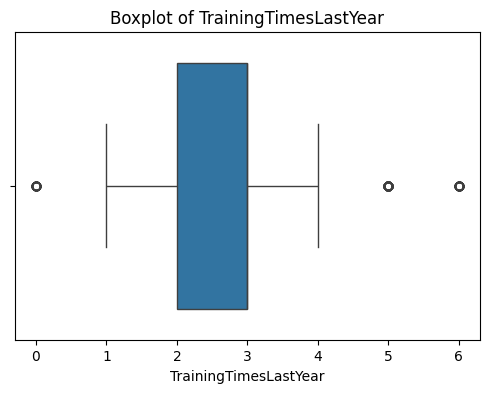

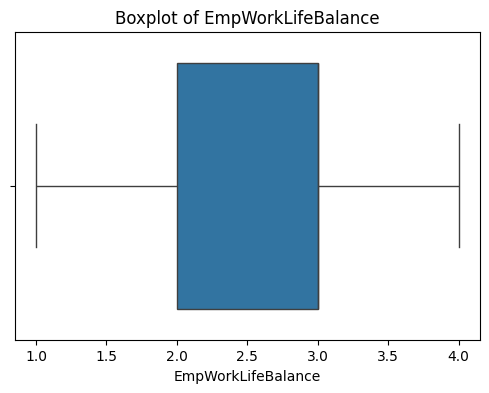

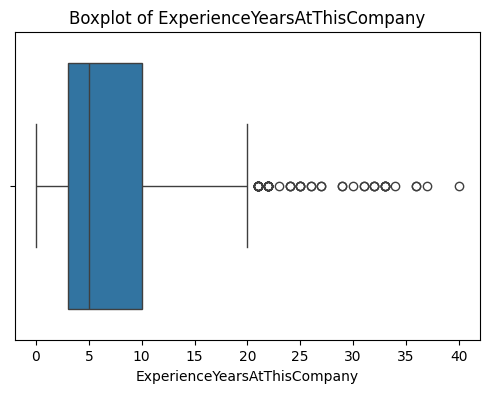

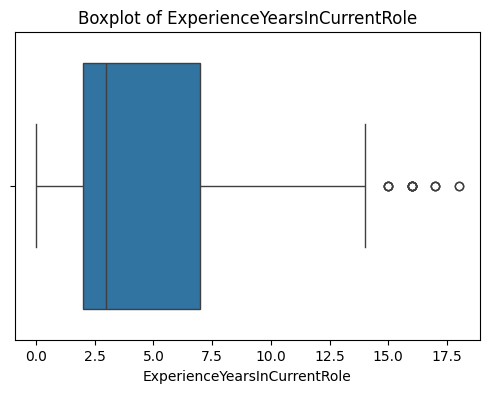

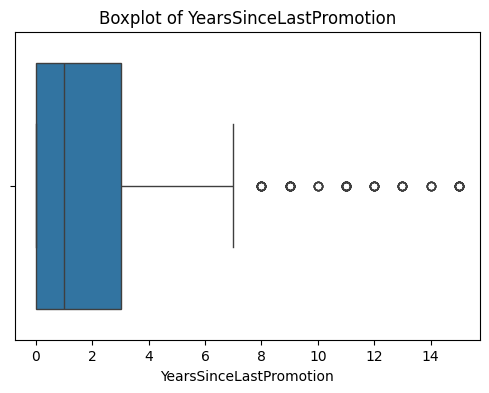

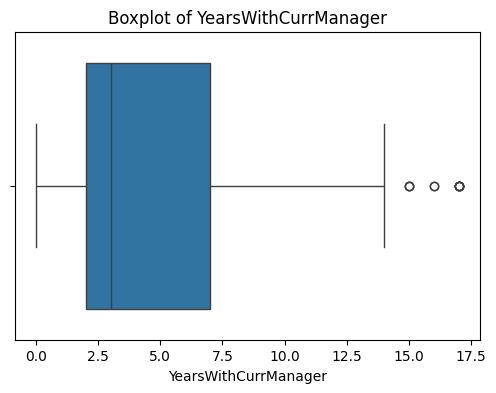

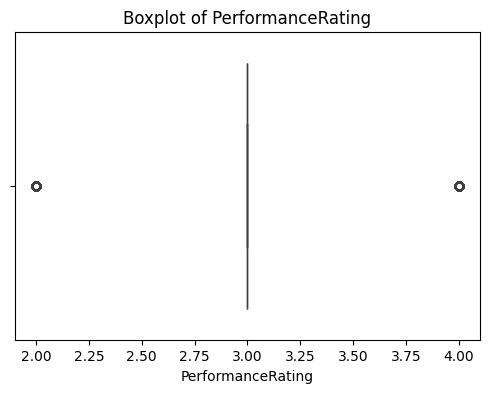

In [ ]:
# Outlier Detection
for col in numeric_cols:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot of {col}")
    plt.show()


##  Target Variable Analysis

The selected target variable (`PerformanceRating`, or any chosen label) was visualized using a count plot.  
Insights:
- The distribution reveals how balanced or imbalanced the target classes are.
- Imbalance can impact model training and evaluation.
- If the target is highly skewed, resampling, class-weight adjustments, or metric selection (e.g., F1-score) will be necessary.


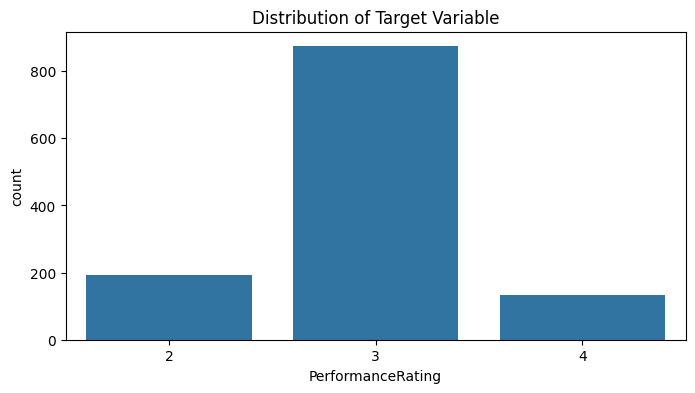

In [ ]:
# Target Variable Analysis

target_column = "PerformanceRating"  # Example placeholder
if target_column in df.columns:
    plt.figure(figsize=(8, 4))
    sns.countplot(data=df, x=target_column)
    plt.title("Distribution of Target Variable")
    plt.show()



##  One-Hot Encoding
Categorical columns such as *Department*, *JobRole*, and *EducationLevel* are converted into numerical dummy variables using one-hot encoding while dropping the first category to avoid multicollinearity.


In [ ]:
#  One-Hot Encoding

# Identified categorical columns from df.dtypes (excluding 'EmpNumber' as it's an identifier)
categorical_cols = ["Gender", "EducationBackground", "MaritalStatus", "EmpDepartment", "EmpJobRole", "BusinessTravelFrequency", "OverTime", "Attrition"]

if "EmpEducationLevel" in df.columns and df["EmpEducationLevel"].dtype != 'object':

    categorical_cols.append("EmpEducationLevel")

df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

KeyError: "None of [Index(['Gender', 'EducationBackground', 'MaritalStatus', 'EmpDepartment',\n       'EmpJobRole', 'BusinessTravelFrequency', 'OverTime', 'Attrition'],\n      dtype='object')] are in the [columns]"

##  Standardization (Z-Score Scaling)
Numeric features like *Age*, *Salary*, and *TrainingHours* are standardized using `StandardScaler` to ensure all numeric variables have comparable scales.


In [ ]:
# Standardization (Z-score)

# Selecting appropriate numeric columns that are not likely ordinal categories or identifiers
numeric_cols = ["Age", "DistanceFromHome", "EmpHourlyRate", "EmpLastSalaryHikePercent",
                "TotalWorkExperienceInYears", "TrainingTimesLastYear", "ExperienceYearsAtThisCompany",
                "ExperienceYearsInCurrentRole", "YearsSinceLastPromotion", "YearsWithCurrManager"]

scaler = StandardScaler()
# Ensure selected columns exist in df before scaling
existing_numeric_cols = [col for col in numeric_cols if col in df.columns]
df[existing_numeric_cols] = scaler.fit_transform(df[existing_numeric_cols])

##  Derived Features
New engineered features are created:
- **TenureBucket:** Groups employees into tenure ranges (`0–2`, `3–5`, `6+` years).
- **PerformanceTrend:** Measures performance improvement or decline using the difference between last two ratings (if available).
- **EngagementScore:** Composite metric combining job satisfaction, work-life balance, and overtime behavior.
- **TenureBucket** is also one-hot encoded.


In [ ]:
# Derived Features

# Tenure buckets
def tenure_bucket(years):
    if years <= 2:
        return "0-2"
    elif years <= 5:
        return "3-5"
    else:
        return "6+"

# Corrected column name from 'YearsAtCompany' to 'ExperienceYearsAtThisCompany'
if "ExperienceYearsAtThisCompany" in df.columns:
    df["TenureBucket"] = df["ExperienceYearsAtThisCompany"].apply(tenure_bucket)
else:
    print("Column 'ExperienceYearsAtThisCompany' not found for TenureBucket calculation.")


if {"LastRating", "PreviousRating"}.issubset(df.columns):
    df["PerformanceTrend"] = df["LastRating"] - df["PreviousRating"]
else:
    print("Columns 'LastRating' or 'PreviousRating' not found for PerformanceTrend calculation.")

# Engagement score (composite of satisfaction, work-life balance, overtime)
# Corrected column names from 'JobSatisfaction' to 'EmpJobSatisfaction' and 'WorkLifeBalance' to 'EmpWorkLifeBalance'
if {"EmpJobSatisfaction", "EmpWorkLifeBalance", "OverTime"}.issubset(df.columns):
    # Normalize overtime: 1 if 'Yes', 0 if 'No'

    overtime_col_name = 'OverTime_Yes'
    if overtime_col_name in df.columns:
        df["OverTimeFlag"] = df[overtime_col_name] # Use the dummy variable directly
    elif "OverTime" in df.columns and df["OverTime"].dtype == 'object':
        df["OverTimeFlag"] = df["OverTime"].map({"Yes": 1, "No": 0})
    else:
        print("Cannot determine 'OverTime' status for EngagementScore calculation.")
        df["OverTimeFlag"] = 0 # Default to 0 if not found/processed

    df["EngagementScore"] = (
        df["EmpJobSatisfaction"].astype(float)
        + df["EmpWorkLifeBalance"].astype(float)
        - df["OverTimeFlag"].astype(float)
    )
else:
    print("Columns 'EmpJobSatisfaction', 'EmpWorkLifeBalance', or 'OverTime' not found for EngagementScore calculation.")

# One-hot encode TenureBucket
if "TenureBucket" in df.columns:
    df = pd.get_dummies(df, columns=["TenureBucket"], drop_first=True)



##  PCA (Principal Component Analysis)
All numeric features are standardized and passed through PCA to extract the top 5 principal components.  
A new DataFrame containing `PCA_1` to `PCA_5` is created and appended to the main dataset.


In [ ]:
# Principal Component Analysis (PCA)

# Select numeric features for PCA (after all previous transformations)
numeric_for_pca = df.select_dtypes(include=np.number)

# Drop EmpNumber if it's still present and numeric, as it's an identifier
if 'EmpNumber' in numeric_for_pca.columns:
    numeric_for_pca = numeric_for_pca.drop(columns=['EmpNumber'])

# Standardize again before PCA
scaler_pca = StandardScaler()
# Handle cases where numeric_for_pca might be empty or have only one column
if not numeric_for_pca.empty and numeric_for_pca.shape[1] > 0:
    numeric_scaled = scaler_pca.fit_transform(numeric_for_pca)

    # Apply PCA (keep top 5 components as example)
    # Ensure n_components does not exceed the number of features
    n_components = min(5, numeric_scaled.shape[1])
    pca = PCA(n_components=n_components)
    pca_components = pca.fit_transform(numeric_scaled)

    # Create PCA dataframe
    pca_df = pd.DataFrame(
        pca_components,
        columns=[f"PCA_{i+1}" for i in range(pca.n_components_)]
    )

    # Concatenate PCA features with original dataframe
    df = pd.concat([df.reset_index(drop=True), pca_df.reset_index(drop=True)], axis=1)
    print("\nExplained Variance Ratio by PCA:", pca.explained_variance_ratio_)
else:
    print("Not enough numeric features for PCA after previous transformations.")


# Final Output

print("Transformed Data Shape:", df.shape)
print("Columns after transformation:\n", df.columns.tolist())

# Data Encoding/Data Wrangling

In [ ]:
# Encoding all the ordinal columns and creating a dummy variable for them to see if there are any effects on Performance Rating
enc = LabelEncoder()
for i in (2,3,4,5,6,7,16,26):
    df.iloc[:,i] = enc.fit_transform(df.iloc[:,i])
df.head()

In [ ]:
# Finding out the correlation coeffecient to find out which predictors are significant.
df.select_dtypes(include=np.number).corr()

There are a lot of columns in the predictor variable. So, the correlation coeffecient is calculated to see which of them are important and these are then used for training methods. From there, we also get the top factors which affect performance. We can see that the most important features selectd were Department, Job Role, Environment Satisfaction, Last Salary Hike Percent, Work Life Balance, Experience Years At This Company, Experience Years In Current Role, Years Since Last Promotion, Years With Current Manager. These were selected because their correlation coeffecient with Performance Rating was more than 0.1. Standardization and Label Encoding was also used for feature transformation.

A separate analysis considering all the predictors was carried out but it resulted in decreasing the accuracy. Similarly, Principal Component Analysis also reduces the accuracy.

#Top 3 factors which affect the employee performance are


1.   Employee EnvironmentSatisfaction
2.   Employee Last Salary Hike Percent
3.   Years Since Last Promotion
